<a href="https://colab.research.google.com/github/pedrohenss/Analise-Dados-FIFA21/blob/main/FIFA21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="18%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---
<center><img alt="FIFA21" width="800" height="400"  src="https://cdn-images-1.medium.com/max/900/1*PE8OVhK5AQ4oYDF_jqz7yg.png"></center>

In [1]:
# Importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando os dados
df = pd.read_csv('/content/drive/MyDrive/FIFA21-dataset/players_21.csv')

In [3]:
# Verificando as Entradas e as Variáveis
print('Entradas:\t ', (df.shape[0]))
print('Variáveis:\t ', (df.shape[1]), '\n')

display(df.dtypes)

# Pedindo ao Pandas a "head" do nosso Dataset (5 primeiras linhas)
df.head()

Entradas:	  18944
Variáveis:	  106 



sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 106, dtype: object

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [4]:
df_novo = df.drop(columns=['sofifa_id','player_url', 'dob', 'wage_eur', 'nation_jersey_number', 'international_reputation', 'real_face', 
                 'release_clause_eur', 'ls', 'st', 'rs', 'lw',
                 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
                 'lb', 'lcb', 'cb', 'rcb', 'rb'])

In [5]:
df_novo.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,"RW, ST, CF",Left,4,4,Medium/Low,Messi,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,"ST, LW",Right,4,5,High/Low,C. Ronaldo,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,GK,Right,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,ST,Right,4,4,High/Medium,PLAYER_BODY_TYPE_276,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,"LW, CAM",Right,5,5,High/Medium,Neymar,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11


In [6]:
# Selecionando as features numéricas
df_num = pd.DataFrame(df[['overall', 'potential',	'weak_foot',	'skill_moves', 'pace',	'shooting', 'passing',	
                          'dribbling',	'defending',	'physic',	'attacking_crossing',	'attacking_finishing',
                          'attacking_heading_accuracy',	'attacking_short_passing',	'attacking_volleys',	
                          'skill_dribbling',	'skill_curve', 'skill_fk_accuracy',	'skill_long_passing',	
                          'skill_ball_control',	'movement_acceleration',	'movement_sprint_speed', 
                          'movement_agility',	'movement_reactions',	'movement_balance',	'power_shot_power',	
                          'power_jumping',	'power_stamina', 'power_strength',	'power_long_shots',	
                          'mentality_aggression',	'mentality_interceptions',	'mentality_positioning', 
                          'mentality_vision',	'mentality_penalties',	'mentality_composure',	'defending_marking',	
                          'defending_standing_tackle', 'defending_sliding_tackle',	'goalkeeping_diving',	'goalkeeping_handling',
                          'goalkeeping_kicking',	'goalkeeping_positioning',	'goalkeeping_reflexes']].values)

# Salvando os nomes das colunas
cols = df[['overall',	'potential',	'weak_foot',	'skill_moves', 'pace',	'shooting', 'passing',	
           'dribbling',	'defending',	'physic',	'attacking_crossing',	'attacking_finishing',
           'attacking_heading_accuracy',	'attacking_short_passing',	'attacking_volleys',	
           'skill_dribbling',	'skill_curve', 'skill_fk_accuracy',	'skill_long_passing',	
           'skill_ball_control',	'movement_acceleration',	'movement_sprint_speed', 
           'movement_agility',	'movement_reactions',	'movement_balance',	'power_shot_power',	
           'power_jumping',	'power_stamina', 'power_strength',	'power_long_shots',	
           'mentality_aggression',	'mentality_interceptions',	'mentality_positioning', 
           'mentality_vision',	'mentality_penalties',	'mentality_composure',	'defending_marking',	
           'defending_standing_tackle', 'defending_sliding_tackle',	'goalkeeping_diving',	'goalkeeping_handling',
           'goalkeeping_kicking',	'goalkeeping_positioning',	'goalkeeping_reflexes']].columns

In [7]:
df_num.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,93.0,93.0,4.0,4.0,85.0,92.0,91.0,95.0,38.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,92.0,92.0,4.0,5.0,89.0,93.0,81.0,89.0,35.0,77.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0
2,91.0,93.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0
3,91.0,91.0,4.0,4.0,78.0,91.0,78.0,85.0,43.0,82.0,71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,NaN,42.0,19.0,15.0,6.0,12.0,8.0,10.0
4,91.0,91.0,5.0,5.0,91.0,85.0,86.0,94.0,36.0,59.0,85.0,87.0,62.0,87.0,87.0,95.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,NaN,30.0,29.0,9.0,9.0,15.0,15.0,11.0


In [8]:
# Substituindo os valores nulos por 0

df_num = df_num.fillna(0)
df_num.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,93.0,93.0,4.0,4.0,85.0,92.0,91.0,95.0,38.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,0.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,92.0,92.0,4.0,5.0,89.0,93.0,81.0,89.0,35.0,77.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,0.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
2,91.0,93.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,0.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
3,91.0,91.0,4.0,4.0,78.0,91.0,78.0,85.0,43.0,82.0,71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,88.0,0.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
4,91.0,91.0,5.0,5.0,91.0,85.0,86.0,94.0,36.0,59.0,85.0,87.0,62.0,87.0,87.0,95.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,91.0,83.0,80.0,62.0,81.0,50.0,84.0,51.0,36.0,87.0,90.0,92.0,93.0,0.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0


In [9]:
# Colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,1.000000,0.958333,0.75,0.75,0.885417,0.989247,0.978495,1.000000,0.417582,0.714286,0.897727,1.000000,0.738636,0.965517,0.977011,1.000000,0.988889,1.000000,0.977273,1.000000,0.928571,0.809524,0.939024,0.985915,0.976471,0.883117,0.6625,0.705882,0.654321,1.000000,0.402299,0.420455,0.978495,1.000000,0.802326,1.000000,0.0,0.340909,0.232558,0.056180,0.109890,0.152174,0.144444,0.078652
1,0.978261,0.937500,0.75,1.00,0.927083,1.000000,0.870968,0.936842,0.384615,0.846154,0.886364,1.000000,0.965909,0.862069,0.954023,0.912088,0.855556,0.797753,0.818182,0.956044,0.880952,0.940476,0.890244,1.000000,0.694118,0.987013,1.0000,0.847059,0.765432,0.988889,0.620690,0.295455,1.000000,0.848837,0.906977,0.988095,0.0,0.306818,0.232558,0.067416,0.109890,0.152174,0.144444,0.112360
2,0.956522,0.958333,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079545,0.086957,0.113636,0.413793,0.114943,0.076923,0.100000,0.101124,0.397727,0.274725,0.357143,0.571429,0.646341,0.901408,0.435294,0.532468,0.7875,0.341176,0.765432,0.088889,0.287356,0.181818,0.096774,0.651163,0.058140,0.666667,0.0,0.079545,0.162791,0.966292,1.000000,0.836957,0.988889,1.000000
3,0.956522,0.916667,0.75,0.75,0.812500,0.978495,0.838710,0.894737,0.472527,0.901099,0.738636,0.989130,0.909091,0.885057,0.988506,0.879121,0.833333,0.898876,0.738636,0.912088,0.761905,0.785714,0.768293,0.971831,0.823529,0.922078,0.8625,0.752941,0.864198,0.900000,0.827586,0.522727,0.989247,0.813953,0.953488,0.904762,0.0,0.420455,0.174419,0.157303,0.054945,0.119565,0.077778,0.101124
4,0.956522,0.916667,1.00,1.00,0.947917,0.913978,0.924731,0.989474,0.395604,0.648352,0.897727,0.913043,0.647727,0.919540,0.965517,0.989011,0.933333,0.943820,0.863636,0.989011,0.964286,0.916667,1.000000,0.943662,0.835294,0.805195,0.5875,0.811765,0.419753,0.888889,0.482759,0.375000,0.913978,0.941860,1.000000,0.964286,0.0,0.284091,0.290698,0.089888,0.087912,0.152174,0.155556,0.112360


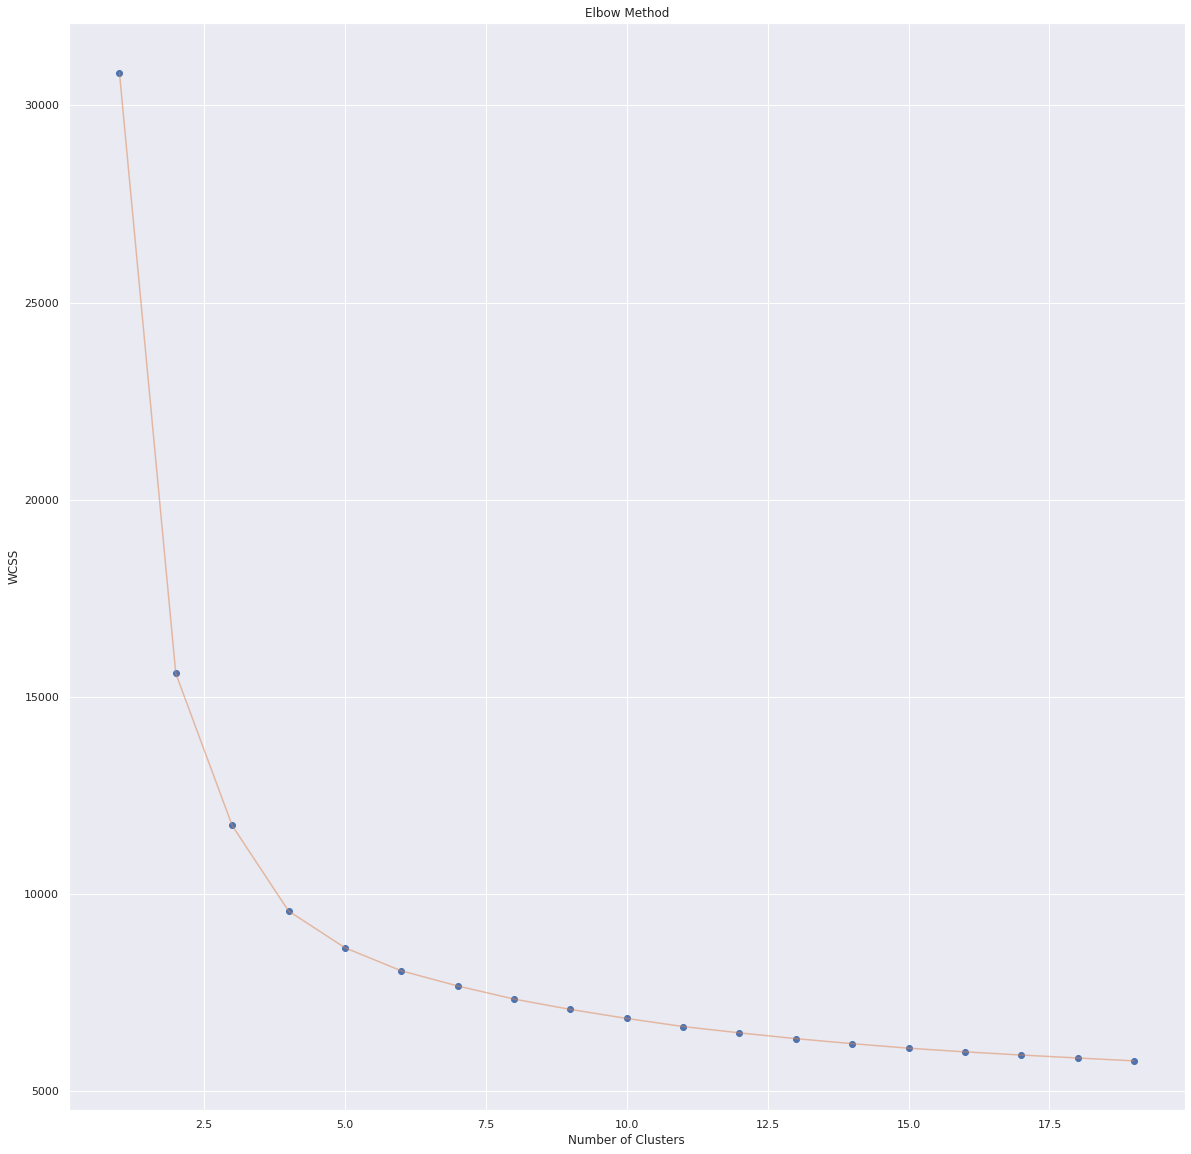

In [10]:
wcss = []
for i in range(1,20):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method  
plt.figure(figsize=(20,20))
plt.plot(range(1,20), wcss, 'o')
plt.plot(range(1 , 20) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [11]:
# Verificar os resultados
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [30831.489651854194, 15595.49232668642, 11741.30313884507, 9575.032259762404, 8642.301488119945, 8057.312546988731, 7673.7401849591515, 7340.801099972989, 7078.545322792037, 6849.5382608884465, 6644.234554998608, 6484.276489359903, 6337.423121556458, 6210.418587701454, 6095.228823975833, 6002.373147303247, 5921.566892160461, 5847.317231885085, 5773.430527489878]


In [12]:
# Diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-15235.99732517  -3854.18918784  -2166.27087908   -932.73077164
   -584.98894113   -383.57236203   -332.93908499   -262.25577718
   -229.0070619    -205.30370589   -159.95806564   -146.8533678
   -127.00453386   -115.18976373    -92.85567667    -80.80625514
    -74.24966028    -73.8867044 ]


In [13]:
# Instanciando o modelo
kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

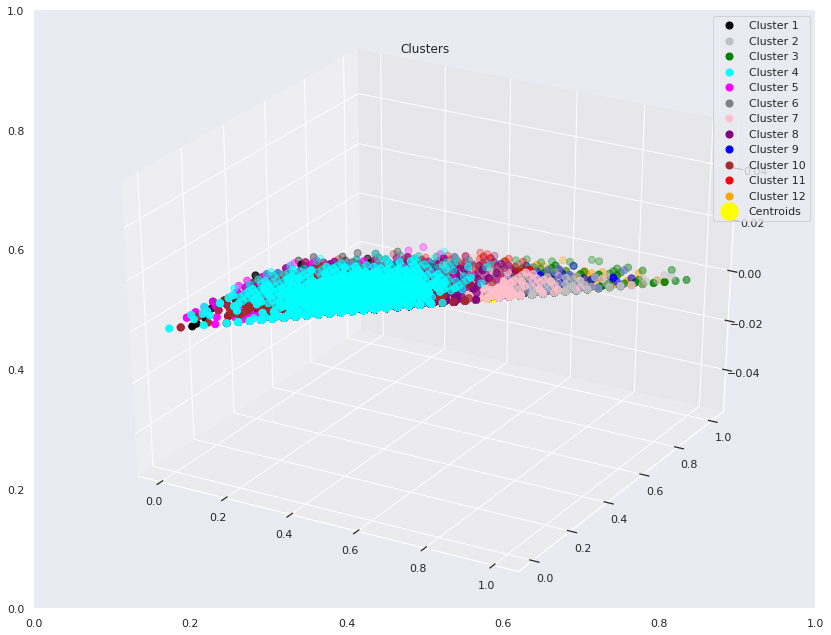

In [14]:
# Visualizando os clusters
fig, ax = plt.subplots(figsize=(14,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'black',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'silver', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0],scaled[y_kmeans == 6,1], s= 50, c= 'pink',label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'purple', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'blue', label= 'Cluster 9')
plt.scatter(scaled[y_kmeans == 9,0], scaled[y_kmeans == 9,1], s= 50, c= 'brown', label= 'Cluster 10')
plt.scatter(scaled[y_kmeans == 10,0], scaled[y_kmeans == 10,1], s= 50, c= 'red', label= 'Cluster 11')
plt.scatter(scaled[y_kmeans == 11,0], scaled[y_kmeans == 11,1], s= 50, c= 'orange', label= 'Cluster 12')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [15]:
# visualizando as previsões
y_kmeans

array([2, 2, 1, ..., 4, 4, 3], dtype=int32)

In [16]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(18944, 1)


,cluster
0,2
1,2
2,1
3,2
4,2


In [17]:
# concatenando os clusters 
df = pd.concat([df_novo, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(18944, 73)


,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,"RW, ST, CF",Left,4,4,Medium/Low,Messi,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,"ST, LW",Right,4,5,High/Low,C. Ronaldo,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,2
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,GK,Right,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,1
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,ST,Right,4,4,High/Medium,PLAYER_BODY_TYPE_276,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,2
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,"LW, CAM",Right,5,5,High/Medium,Neymar,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,2


In [18]:
# média de overall por cluster
df.groupby(['cluster']).overall.mean().sort_values(ascending=False)

cluster
11    74.645327
2     74.633014
1     70.057282
8     70.053257
6     67.818297
5     66.390157
10    65.761509
7     65.013066
3     60.355820
9     59.191651
4     58.143969
0     56.694938
Name: overall, dtype: float64

In [19]:
df.groupby(['cluster']).potential.mean().sort_values(ascending=False)

cluster
2     76.709654
11    76.701665
8     73.292658
1     72.475728
10    71.500277
6     71.268139
5     69.987161
7     69.557629
3     68.570547
0     68.343195
4     67.486381
9     67.475332
Name: potential, dtype: float64

In [20]:
# conferindo o número de jogadores por cluster
df['cluster'].value_counts()

3     2268
7     2143
8     1934
10    1803
6     1585
11    1562
0     1521
5     1402
2     1357
4     1285
9     1054
1     1030
Name: cluster, dtype: int64

In [21]:
# checando os 50 primeiros jogadores no cluster
df.loc[df['cluster'] == 2][:50]

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,"RW, ST, CF",Left,4,4,Medium/Low,Messi,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,"ST, LW",Right,4,5,High/Low,C. Ronaldo,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,2
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,ST,Right,4,4,High/Medium,PLAYER_BODY_TYPE_276,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,2
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,"LW, CAM",Right,5,5,High/Medium,Neymar,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,2
6,K. Mbappé,Kylian Mbappé Lottin,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,105500000,"ST, LW, RW",Right,4,5,High/Low,PLAYER_BODY_TYPE_343,"#Speedster, #Dribbler, #Acrobat",LS,7.0,NaN,2018-07-01,2022.0,RM,96.0,86.0,78.0,91.0,39.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Flair, Speed Dribbler (AI), Outs...",78,91,73,83,83,92,79,63,70,90,96,96,92,92,82,86,77,86,76,79,62,38,91,80,70,84,NaN,34,32,13,5,7,11,6,2
10,S. Mané,Sadio Mané,28,175,69,Senegal,Liverpool,English Premier League,1.0,90,90,78000000,LW,Right,4,4,High/Medium,PLAYER_BODY_TYPE_313,"#Speedster, #Dribbler, #Acrobat",LW,10.0,NaN,2016-07-01,2023.0,NaN,94.0,85.0,80.0,90.0,44.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Speed Dribbler (AI)",76,90,84,85,75,91,76,64,71,89,95,93,93,93,86,84,86,88,70,78,75,35,92,85,71,84,NaN,42,38,10,10,15,7,14,2
11,M. Salah,Mohamed Salah Ghaly,28,175,71,Egypt,Liverpool,English Premier League,1.0,90,90,78000000,RW,Left,3,4,High/Medium,Mohamed Salah,"#Speedster, #Dribbler, #Acrobat, #Clinical Fin...",RW,11.0,NaN,2017-07-01,2023.0,RW,93.0,86.0,81.0,90.0,45.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse S

In [22]:
cluster2 = df.loc[df['cluster'] == 2]

variaveis = cluster2[['pace',	'shooting', 'passing',	
                      'dribbling',	'defending',	'physic',	'attacking_crossing',	'attacking_finishing',
                      'attacking_heading_accuracy',	'attacking_short_passing',	'attacking_volleys',	
                      'skill_dribbling',	'skill_curve', 'skill_fk_accuracy',	'skill_long_passing',	
                      'skill_ball_control',	'movement_acceleration',	'movement_sprint_speed', 
                      'movement_agility',	'movement_reactions',	'movement_balance',	'power_shot_power',	
                      'power_jumping',	'power_stamina', 'power_strength',	'power_long_shots',	
                      'mentality_aggression',	'mentality_interceptions',	'mentality_positioning', 
                      'mentality_vision',	'mentality_penalties',	'mentality_composure',	'defending_marking',	
                      'defending_standing_tackle', 'defending_sliding_tackle',	'goalkeeping_diving',	'goalkeeping_handling',
                      'goalkeeping_kicking',	'goalkeeping_positioning',	'goalkeeping_reflexes']]

In [23]:
variaveis.fillna(0)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,0.0,35,24,6,11,15,14,8
1,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,0.0,32,24,7,11,15,14,11
3,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,0.0,42,19,15,6,12,8,10
4,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,0.0,30,29,9,9,15,15,11
6,96.0,86.0,78.0,91.0,39.0,76.0,78,91,73,83,83,92,79,63,70,90,96,96,92,92,82,86,77,86,76,79,62,38,91,80,70,84,0.0,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,73.0,63.0,71.0,67.0,44.0,67.0,69,59,55,72,62,68,74,67,73,70,65,79,58,63,55,72,62,75,69,63,55,42,53,72,66,70,0.0,38,43,9,6,9,12,9
8463,75.0,64.0,68.0,71.0,52.0,58.0,66,62,62,70,65,72,68,68,65,67,74,75,75,64,78,67,75,71,53,62,48,48,68,70,64,60,0.0,49,49,6,8,7,14,10
8823,82.0,69.0,63.0,70.0,35.0,59.0,70,63,52,60,67,69,76,73,53,71,84,80,81,65,66,82,57,69,58,75,50,38,58,61,55,65,0.0,32,28,8,16,15,10,11
9547,71.0,68.0,61.0,67.0,35.0,59.0,59,65,59,58,70,67,72,64,58,67,67,74,68,67,72,72,80,61,59,68,53,31,71,67,80,72,0.0,28,34,10,11,12,13,15


In [24]:
variaveis.describe()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,0.0,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,76.550479,71.959469,69.711864,76.215181,39.652911,65.217391,68.364038,71.807664,59.453943,72.258659,67.733235,76.433309,71.005158,64.535741,64.526161,76.058954,77.184230,76.043478,78.119381,72.396463,74.476787,74.864407,66.662491,70.544584,64.798821,70.887988,59.146647,37.829772,73.767870,71.273397,67.963891,72.517318,NaN,37.241710,32.842299,10.530582,10.714075,10.663228,10.507001,10.501105
std,8.934859,5.275924,5.608565,4.863109,7.798321,8.120264,7.726719,6.573546,12.575388,5.316267,8.007345,5.441646,8.255996,11.425774,8.260165,5.093324,9.222101,9.286748,7.922870,6.118948,9.695456,6.045492,12.931845,9.034943,11.539533,6.296097,12.776090,10.907281,6.163569,6.443971,8.191712,6.339279,NaN,11.089829,10.271616,3.134636,3.132174,3.138059,3.182407,3.204123
min,30.000000,56.000000,54.000000,63.000000,18.000000,37.000000,34.000000,51.000000,20.000000,56.000000,32.000000,63.000000,21.000000,26.000000,33.000000,61.000000,31.000000,29.000000,52.000000,52.000000,35.000000,52.000000,29.000000,32.000000,29.000000,42.000000,23.000000,11.000000,51.000000,43.000000,41.000000,50.000000,NaN,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,71.000000,68.000000,66.000000,73.000000,34.000000,60.000000,64.000000,67.000000,50.000000,68.000000,63.000000,73.000000,66.000000,58.000000,60.000000,73.000000,72.000000,70.000000,73.000000,68.000000,69.000000,71.000000,59.000000,66.000000,58.000000,67.000000,50.000000,30.000000,70.000000,67.000000,62.000000,68.000000,NaN,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,77.000000,71.000000,69.000000,76.000000,39.000000,65.000000,69.000000,71.000000,60.000000,72.000000,68.000000,76.000000,71.000000,67.000000,65.000000,76.000000,77.000000,76.000000,78.000000,72.000000,75.000000,75.000000,68.000000,71.000000,65.000000,71.000000,59.000000,38.000000,73.000000,71.000000,68.000000,72.000000,NaN,37.000000,32.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,82.000000,75.000000,73.000000,79.000000,45.000000,71.000000,73.000000,76.000000,69.000000,76.000000,73.000000,80.000000,77.000000,73.000000,70.000000,79.000000,84.000000,82.000000,84.000000,76.000000,81.000000,79.000000,75.000000,76.000000,72.000000,75.000000,68.000000,45.000000,78.000000,75.000000,73.000000,77.000000,NaN,46.000000,40.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,96.000000,93.000000,91.000000,95.000000,62.000000,90.000000,92.000000,95.000000,93.000000,92.000000,90.000000,96.000000,94.000000,94.000000,91.000000,96.000000,97.000000,96.000000,96.000000,95.000000,96.000000,94.000000,95.000000,95.000000,95.000000,94.000000,93.000000,69.000000,95.000000,95.000000,92.000000,96.000000,NaN,68.000000,60.000000,27.000000,25.000000,31.000000,33.000000,37.000000


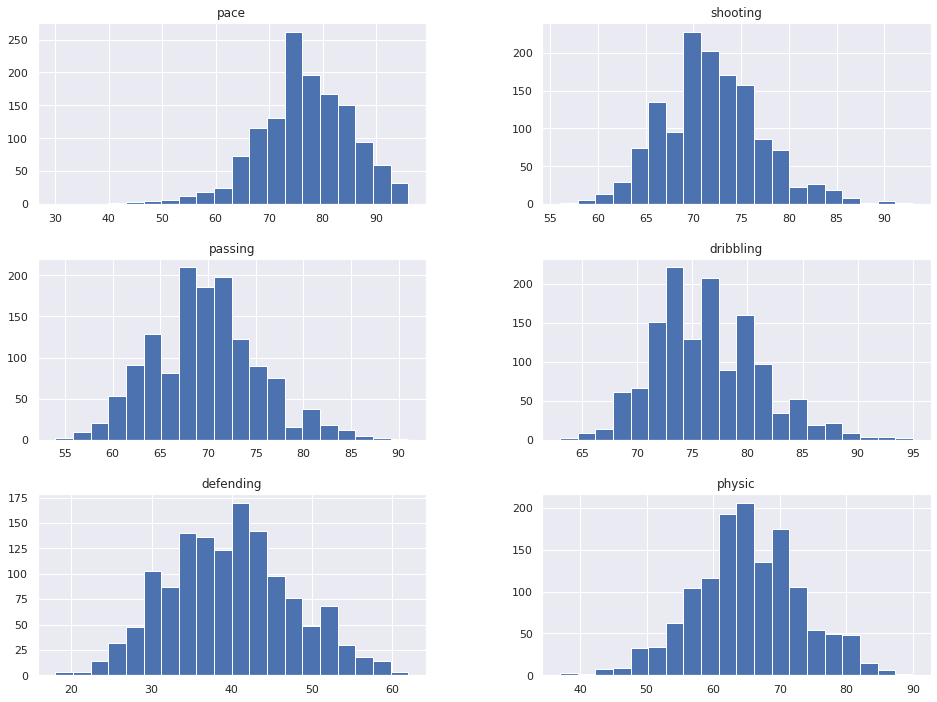

In [25]:
variaveis[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].hist(bins = 20, figsize=(16, 12))
plt.show()

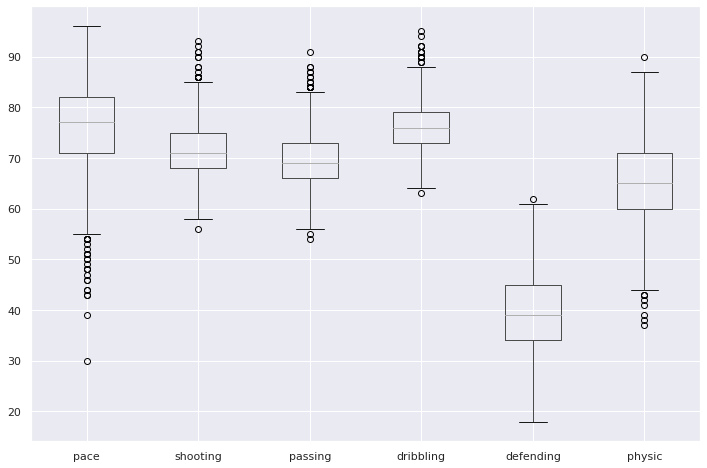

In [26]:
variaveis[["pace", "shooting", "passing", "dribbling", "defending", "physic"]].boxplot(grid=True, figsize=(12,8))
plt.show()

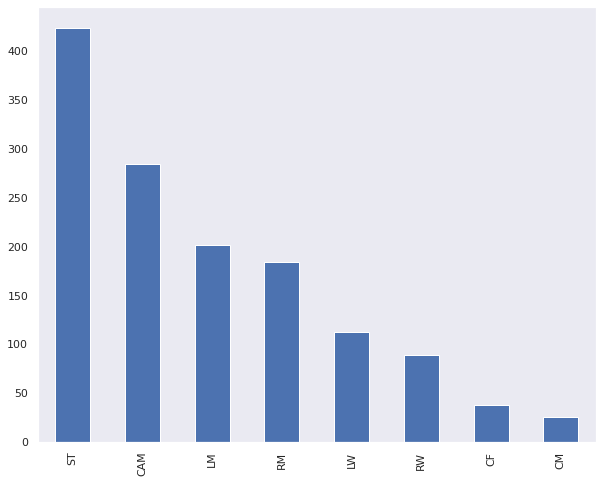

In [27]:
cluster2['player_positions'].apply(lambda x: x.split(',')[0]).value_counts().plot.bar(grid=False, figsize = (10,8));

In [28]:
import plotly.express as px
import plotly.graph_objects as go  

In [29]:
# Plotando Scatter Plot do Valor em Euros x Potencial

jogadores = df.loc[df['cluster'] == 2]

fig = px.scatter(jogadores, x = "value_eur", y = "potential", size="age", 
                 color = 'value_eur', hover_name = "short_name", size_max = 80, width = 1000, 
                 color_continuous_scale=["#2166ac", "#4393c3", "#92c5de", "#f7f7f7", "#fddbc7", 
                                         "#f4a582", "#d6604d", "#b2182b", "#67001f"])

fig.update_layout(title=go.layout.Title(text="<b>Valor em Euros x Potencial</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
                color="#787878"
            )))

fig.add_annotation(text="Relação entre o valor em euros e o potencial dos jogadores do cluster 2. <b>Tamanho</b>: Idade",
                   xref="paper", yref="paper", x=-0.001, y=1.06, showarrow=False)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.layout.coloraxis.colorbar.title = 'Valor em Euros'

fig.update_xaxes(title = 'Valor em Euros', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = 'Potencial', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.show()

In [30]:
# Plotando Scatter Plot do Idade x Potencial

fig = px.scatter(jogadores, x = "age", y = "potential", size="value_eur", 
                 color = 'age', hover_name = "short_name", size_max = 80, width = 1000, 
                 color_continuous_scale=["#2166ac", "#4393c3", "#92c5de", "#f7f7f7", "#fddbc7", 
                                         "#f4a582", "#d6604d", "#b2182b", "#67001f"])

fig.update_layout(title=go.layout.Title(text="<b>Idade x Potencial</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
                color="#787878"
            )))

fig.add_annotation(text="Relação entre o potencial e a idadedos jogadores do cluster 2. <b>Tamanho</b>: Valor em Euros",
                   xref="paper", yref="paper", x=-0.001, y=1.06, showarrow=False)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.layout.coloraxis.colorbar.title = 'Valor em Euros'

fig.update_xaxes(title = 'Idade', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = 'Potencial', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.show()

In [31]:
# Plotando Scatter Plot: Valor em Euros x Idade

fig = px.scatter(jogadores, x = "value_eur", y = "age",
                 color = 'potential', hover_name = "short_name", size_max = 80, width = 1000, 
                 color_continuous_scale=["#2166ac", "#4393c3", "#92c5de", "#f7f7f7", "#fddbc7", 
                                         "#f4a582", "#d6604d", "#b2182b", "#67001f"])

fig.update_layout(title=go.layout.Title(text="<b>Valor em Euro x Idade</b>", x=0.080, y=0.99, font=dict(
                family="sans-serif",
                size=20,
                color="#787878"
            )))

fig.add_annotation(text="Relação entre o valor em euros e a idade dos jogadores do cluster 2.",
                   xref="paper", yref="paper", x=-0.001, y=1.06, showarrow=False)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.layout.coloraxis.colorbar.title = 'Potencial'

fig.update_xaxes(title = 'Valor em Euro', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(title = 'Idade', showgrid=False, showline=True, linewidth=2, linecolor='black')
fig.show()

In [32]:
top_player =  df[df.short_name.isin(['L. Messi', 'Cristiano Ronaldo', 'R. Lewandowski', 'Neymar Jr'])]
top_player = top_player[['short_name', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

In [33]:
def create_polarcharts(
    stats: list,
    color: str,
    img_link: str,
    name_one: str,
    name_two: str
):
    '''
    The function accepts the following arguments:
    
        stats - takes a list of numeric values of characteristics
        color - takes the color of the lines in the diagram
        img_link - accepts a link to an image of a football player
        name_one - takes the name of the footballer
        name_two - accepts any additional text
    
    '''
    # Determine the number of rows and columns
    fig = make_subplots(rows=1, cols=2, 
                        # We indicate the types of graphs in each block
                        specs=[[{'type': 'xy'}, {"type": "polar"}]], 
                        # Setting the width of each column
                        column_widths=[0.5, 0.5])  
    
    # Create a Polar Chart
    fig.add_trace(go.Scatterpolar(
                     # Passing numeric parameters
                     r=stats,
                     # Passing parameter names
                     theta=['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physic', 'Pace'],
                     # Setting the fill parameter
                     fill='toself',
                     # Specify the signature on hover
                     hovertemplate='<b>%{theta}</b>' + f'<b>: '+'%{r}',
                     # Specify a caption for the legend
                     name='',
                     # Specifying the line color
                     line=dict(color=color)),
                     # Specify line and column numbers
                     row=1, col=2)
    
    # Add an image to the chart
    fig.layout.images = [dict(
               # Passing a link to the image
               source=img_link,
               # Specify the position of the image along the x-axis
               x=0.1, 
               # Specify the position of the image along the y-axis
               y=0.5,
               # Setting the size of the chart
               sizex=1, 
               sizey=1.6,
               # Setting the position along the x-axis
               xanchor="center", 
               # Setting the y-axis position
               yanchor="middle",
               # Place the image under the chart
               layer="below"
                             )
                        ]

    fig.update_layout(
        # Set the name of the chart
        title=f'<b>{name_one}</b><br><sub>{name_two}</sub>',
        # Setting the background color
        paper_bgcolor="rgb(223, 223, 223)",
        # Setting the chart theme
        template='xgridoff',
        # Passing chart parameters
        polar=dict(
             # Background color
             bgcolor="rgb(223, 223, 223)",
             # Adding a line with numeric divisions
             radialaxis=dict(
                        # Displaying the line
                        visible = True,
                        # Set the range of divisions
                        range = [0, 100]
                            )
                   ), 
        # Passing the parameters to the font
        font=dict(
                  # Font type
                  family='Arials',
                  # Font size
                  size=14,
                  # Font color
                  color='Black'
                 )
    )

    # Displaying the graph
    fig.show()

In [34]:
top_player.style\
          .set_caption('Top players')\
          .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#0080ff')]}])\
          .set_precision(0)\
          .background_gradient(cmap='Blues')

,short_name,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,85,92,91,95,38,65
1,Cristiano Ronaldo,89,93,81,89,35,77
3,R. Lewandowski,78,91,78,85,43,82
4,Neymar Jr,91,85,86,94,36,59


In [59]:
create_polarcharts([85, 92, 91, 95, 38, 65, 85], 
                   'MidnightBlue',
                   'https://media.discordapp.net/attachments/890293790571655181/949389923121774642/f11f2607ab2845a20d6451fdc52e7f22.png?width=344&height=405',
                   'L. Messi',
                   'Forward in FC Barcelona')

In [58]:
create_polarcharts([89,	93,	81,	89,	35,	77, 89], 
                   'Black',
                   'https://media.discordapp.net/attachments/890293790571655181/949389733690224670/Cristiano-Ronaldo-Juventus-PNG-Free-File-Download.png?width=196&height=368',
                   'Cristiano Ronaldo',
                   'Forward in Juventus')

In [53]:
create_polarcharts([78, 91, 78, 85, 43, 82, 78], 
                   'Red',
                   'https://media.discordapp.net/attachments/890293790571655181/949386876484194415/robert-lewandowski_1744_152-ub-800.png?width=304&height=406',
                   'R. Lewandowski',
                   'Forward in FC Bayern München')

In [56]:
create_polarcharts([91,	85,	86,	94,	36,	59, 91], 
                   'midnightblue',
                   'https://media.discordapp.net/attachments/890293790571655181/949388682002055188/kisspng-neymar-paris-saint-germain-f-c-portable-network-g-5b804a6ec5da42.9326068915351343188104.png?width=405&height=406',
                   'Neymar Jr',
                   'Forward in Paris Saint Germain')